<a href="https://colab.research.google.com/github/GabrielPGu/Programas/blob/main/Cin%C3%A9tica_Molecular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cinética Química**

Determinar la energía de activación para la reacción de isomerización (estudio cinético) e indicar si la reacción es endotérmica o exotérmica (estudio termodinámico):

## **Cis_buteno:**

In [ ]:
! pip install rdkit
! pip install pyscf

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [21]:
from pyscf import gto, scf

In [101]:
import numpy as np


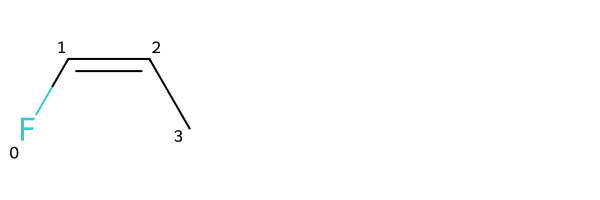

In [5]:
smiles = "F\C=C/C"

mol = Chem.MolFromSmiles(smiles)

Draw.MolsToGridImage([mol])

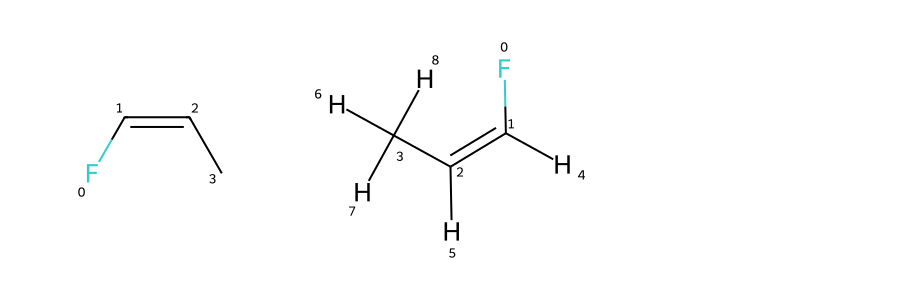

In [9]:
mol_h = Chem.AddHs(mol)

Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [19]:
Chem.AllChem.EmbedMolecule(mol_h)
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.0611    1.5861    0.2378 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3046    0.2703    0.1400 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2677   -0.5364   -0.0736 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1129    0.0064   -0.1990 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3030   -0.1021    0.2327 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4900   -1.5925   -0.1486 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2447    0.8243    0.5311 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2668    0.3918   -1.2278 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8020   -0.8481   -0.0162 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [103]:
Chem.MolToXYZFile(mol_h,"cis_buteno.xyz")

In [104]:
mol = gto.M(atom="cis_buteno.xyz")

In [105]:
mol.basis = "3-21G"

mf = mol.KS()
mf.xc = 'b3lyp'

In [106]:
mf.kernel()

converged SCF energy = -214.252409669538


-214.2524096695381

In [107]:
cis = mf.kernel()
# Save the kernel
np.save("cis.npy", cis)

converged SCF energy = -214.252409669538


## **Trans_buteno:**

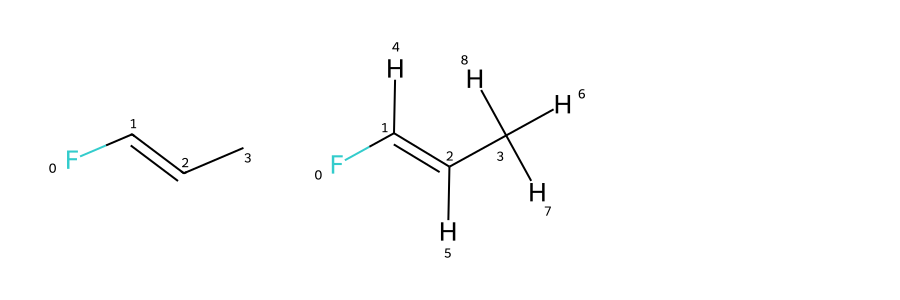

In [28]:
smiles = "F/C=C/C"

mol = Chem.MolFromSmiles(smiles)
mol_h = Chem.AddHs(mol)

Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [112]:
Chem.AllChem.EmbedMolecule(mol_h)
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5389   -0.1547   -0.0693 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2696    0.3237    0.1334 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2704   -0.4754   -0.2239 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1219    0.0477   -0.0023 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0663    1.2942    0.5587 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4265   -1.4606   -0.6561 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4536   -0.2150    1.0391 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1816    1.1341   -0.0819 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8147   -0.4940   -0.6976 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [113]:
Chem.MolToXYZFile(mol_h,"trans_buteno.xyz")

In [114]:
mol2 = gto.M(atom="trans_buteno.xyz")


In [115]:
mol2.basis = "3-21G"

mf2 = mol2.KS()
mf2.xc = 'b3lyp'

In [116]:
mf2.kernel()

converged SCF energy = -214.248924167275


-214.24892416727477

In [118]:
trans = mf2.kernel()
# Save the kernel
np.save("trans.npy", trans)

converged SCF energy = -214.248924167274


## **Estado de Transicion:**

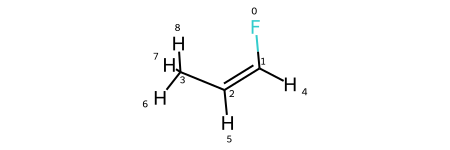

In [71]:
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "initial.xyz")
mol

In [81]:
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),3,2,1,0,i)

  Chem.MolToXYZFile(mol, f"{i}.xyz")

In [84]:
moleculas_diedros = ["0.xyz", "30.xyz", "60.xyz", "90.xyz", "120.xyz",
                    "150.xyz", "180.xyz", "240.xyz", "300.xyz", "330.xyz"]
diedros_lista = []
for i in moleculas_diedros:
  mol = gto.M(atom=i)
  mol.basis = "3-21G"
  mf = mol.KS()
  mf.xc = 'b3lyp'
  #mf.kernel()
  diedros_lista.append(mf.kernel())

converged SCF energy = -214.250604078159
converged SCF energy = -214.229473936681
converged SCF energy = -214.168898487535
converged SCF energy = -214.079538970272
converged SCF energy = -214.172237954583
converged SCF energy = -214.230915229306
converged SCF energy = -214.252409669538
converged SCF energy = -214.169025290329
converged SCF energy = -214.171578001453
converged SCF energy = -214.230595560567


In [ ]:
ET = mf2.kernel()
# Save the kernel
np.save("trans.npy", trans)

### **Grafica:**

In [ ]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [99]:
import matplotlib.pyplot as plt
from energydiagram import ED

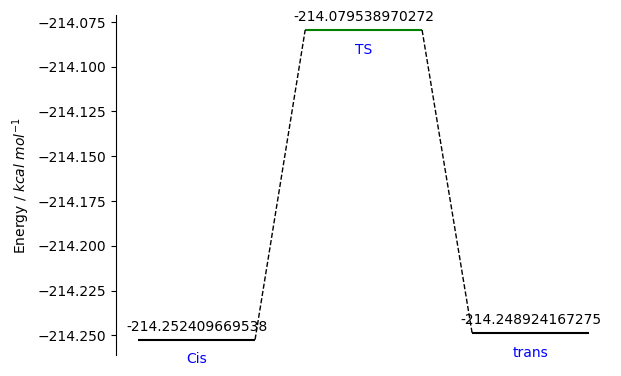

In [121]:
diagram = ED()
diagram.add_level(-214.252409669538,'Cis')
diagram.add_level(-214.079538970272,'TS',color='g')
diagram.add_level(-214.248924167275,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$")

In [124]:
def calcular_variaciones():
  x = -214.248924167275 - (-214.252409669538)
  return x
def calcular_energia_activacion:


In [122]:
min_y = min(diedros_lista)
max_y = max(diedros_lista)
diedros_lista_norm = [(valor - min_y) / (max_y - min_y) for valor in diedros_lista]

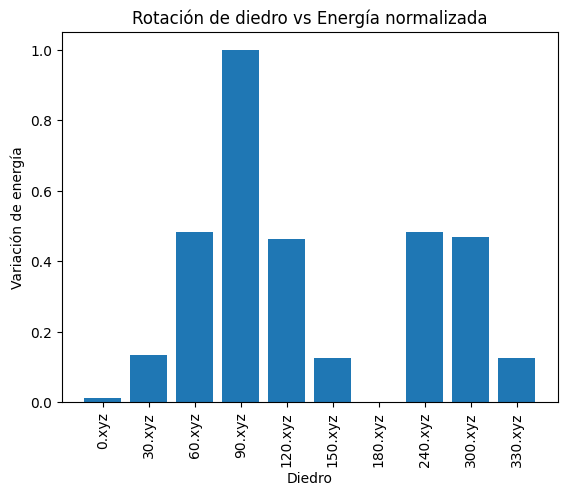

In [123]:
import matplotlib.pyplot as plt

plt.bar(moleculas_diedros,diedros_lista_norm)
plt.xlabel('Diedro')
plt.ylabel('Variación de energía')
plt.xticks(rotation=90)
plt.title('Rotación de diedro vs Energía normalizada')
plt.show()

https://dontpad.com/transition_state